In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
plt.rcParams["figure.dpi"] = 200

root_dir = 'data/'
input_5G_D2_WAVELAB_preprocessed = '5G-D2-WAVELAB-preprocessed.parquet.gzip'
input_5G_DTAG_WAVELAB_preprocessed = '5G-DTAG-WAVELAB-preprocessed.parquet.gzip'
selected_columns = ['lte.ltxbitspersecond', 'lte.lrxbitspersecond', 'lte.lCqi', 'lte.lRsrp', 'lte.lRsrq', 'lte.lRssi', 'lte.lSinr']

In [4]:
df_D2 = pd.read_parquet(root_dir + input_5G_D2_WAVELAB_preprocessed, columns=selected_columns)
df_D2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25750092 entries, 2023-11-24 13:51:45 to 2024-11-01 12:59:48
Data columns (total 7 columns):
 #   Column                Non-Null Count     Dtype  
---  ------                --------------     -----  
 0   lte.ltxbitspersecond  25750092 non-null  Int64  
 1   lte.lrxbitspersecond  25750092 non-null  Int64  
 2   lte.lCqi              25159617 non-null  Float64
 3   lte.lRsrp             25747934 non-null  Float64
 4   lte.lRsrq             25747929 non-null  Float64
 5   lte.lRssi             9219773 non-null   Float64
 6   lte.lSinr             25747929 non-null  Float64
dtypes: Float64(5), Int64(2)
memory usage: 1.7 GB


In [5]:
df_DTAG = pd.read_parquet(root_dir + input_5G_DTAG_WAVELAB_preprocessed, columns=selected_columns)
df_DTAG.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25762417 entries, 2023-11-24 13:51:45 to 2024-11-01 12:59:27
Data columns (total 7 columns):
 #   Column                Non-Null Count     Dtype  
---  ------                --------------     -----  
 0   lte.ltxbitspersecond  25762417 non-null  Int64  
 1   lte.lrxbitspersecond  25762417 non-null  Int64  
 2   lte.lCqi              25248739 non-null  Float64
 3   lte.lRsrp             25748851 non-null  Float64
 4   lte.lRsrq             25748851 non-null  Float64
 5   lte.lRssi             25749073 non-null  Float64
 6   lte.lSinr             25748851 non-null  Float64
dtypes: Float64(5), Int64(2)
memory usage: 1.7 GB


In [6]:
col_rename = {
    'lte.ltxbitspersecond': 'Tx Rate', 
    'lte.lrxbitspersecond': 'Rx Rate',
    'lte.lCqi': 'CQI',
    'lte.lRsrp': 'RSRP', 
    'lte.lRsrq': 'RSRQ',
    'lte.lRssi': 'RSSI', 
    'lte.lSinr': 'SINR'}

df_D2.rename(columns=col_rename, inplace=True)
df_D2.head()

,Tx Rate,Rx Rate,CQI,RSRP,RSRQ,RSSI,SINR
timestamp_router,,,,,,,
2023-11-24 13:51:45,4798856,72048,<NA>,-72.0,-11.0,-38.0,2.0
2023-11-24 13:51:46,3997744,52912,<NA>,-73.0,-10.0,-39.0,2.0
2023-11-24 13:51:47,3916688,46176,<NA>,-73.0,-10.0,-39.0,2.0
2023-11-24 13:51:48,3496752,38480,<NA>,-73.0,-10.0,-39.0,2.0
2023-11-24 13:51:49,4795552,42384,<NA>,-72.0,-11.0,-42.0,8.0


In [7]:
col_rename = {
    'lte.ltxbitspersecond': 'Tx Rate', 
    'lte.lrxbitspersecond': 'Rx Rate',
    'lte.lCqi': 'CQI',
    'lte.lRsrp': 'RSRP', 
    'lte.lRsrq': 'RSRQ',
    'lte.lRssi': 'RSSI', 
    'lte.lSinr': 'SINR'}

df_DTAG.rename(columns=col_rename, inplace=True)
df_DTAG.head()

,Tx Rate,Rx Rate,CQI,RSRP,RSRQ,RSSI,SINR
timestamp_router,,,,,,,
2023-11-24 13:51:45,7335952,517568,<NA>,-78.0,-13.0,-45.0,4.0
2023-11-24 13:51:46,7937200,566784,<NA>,-78.0,-13.0,-45.0,4.0
2023-11-24 13:51:47,6102560,517792,<NA>,-78.0,-13.0,-45.0,4.0
2023-11-24 13:51:48,6740720,493392,<NA>,-78.0,-13.0,-45.0,4.0
2023-11-24 13:51:49,7486880,496816,<NA>,-77.0,-14.0,-43.0,4.0


In [8]:
df_D2_selection = df_D2.add_suffix('1')
df_DTAG_selection = df_DTAG.add_suffix('2')

In [9]:
df_concat = pd.merge(df_D2_selection, df_DTAG_selection, 
                     left_index=True, right_index=True, 
                     how="outer").sort_index()
df_concat.head()

,Tx Rate1,Rx Rate1,CQI1,RSRP1,RSRQ1,RSSI1,SINR1,Tx Rate2,Rx Rate2,CQI2,RSRP2,RSRQ2,RSSI2,SINR2
timestamp_router,,,,,,,,,,,,,,
2023-11-24 13:51:45,4798856,72048,<NA>,-72.0,-11.0,-38.0,2.0,7335952,517568,<NA>,-78.0,-13.0,-45.0,4.0
2023-11-24 13:51:46,3997744,52912,<NA>,-73.0,-10.0,-39.0,2.0,7937200,566784,<NA>,-78.0,-13.0,-45.0,4.0
2023-11-24 13:51:47,3916688,46176,<NA>,-73.0,-10.0,-39.0,2.0,6102560,517792,<NA>,-78.0,-13.0,-45.0,4.0
2023-11-24 13:51:48,3496752,38480,<NA>,-73.0,-10.0,-39.0,2.0,6740720,493392,<NA>,-78.0,-13.0,-45.0,4.0
2023-11-24 13:51:49,4795552,42384,<NA>,-72.0,-11.0,-42.0,8.0,7486880,496816,<NA>,-77.0,-14.0,-43.0,4.0


In [10]:
router_corr = df_concat.corr()
router_corr

,Tx Rate1,Rx Rate1,CQI1,RSRP1,RSRQ1,RSSI1,SINR1,Tx Rate2,Rx Rate2,CQI2,RSRP2,RSRQ2,RSSI2,SINR2
Tx Rate1,1.000000,0.079929,0.034858,0.108514,0.037808,0.033691,0.019719,0.102284,0.079822,0.036983,0.054938,-0.013983,0.079647,0.032954
Rx Rate1,0.079929,1.000000,0.053689,0.092477,0.033297,0.100186,0.061134,0.040392,-0.127932,-0.010753,0.074471,0.075983,0.054756,0.086669
CQI1,0.034858,0.053689,1.000000,0.016767,0.085721,0.508171,0.089044,0.050328,-0.033204,0.012838,0.240628,0.146052,0.239857,0.133310
RSRP1,0.108514,0.092477,0.016767,1.000000,0.637370,0.545753,0.501425,0.099122,-0.002637,-0.054857,0.356904,0.277063,0.299188,0.256269
RSRQ1,0.037808,0.033297,0.085721,0.637370,1.000000,0.123385,0.299687,0.025317,-0.032507,-0.023887,0.129542,0.193646,0.047581,0.155281
RSSI1,0.033691,0.100186,0.508171,0.545753,0.123385,1.000000,0.234814,0.094636,-0.037136,0.038150,0.602201,0.296831,0.584197,0.303649
SINR1,0.019719,0.061134,0.089044,0.501425,0.299687,0.234814,1.000000,0.032929,0.009537,-0.083557,0.441432,0.383677,0.348161,0.297946
Tx Rate2,0.102284,0.040392,0.050328,0.099122,0.025317,0.094636,0.032929,1.000000,0.129780,0.034991,0.072775,0.041903,0.063636,0.086060
Rx Rate2,0.079822,-0.127932,-0.033204,-0.002637,-0.032507,-0.037136,0.009537,0.129780,1.000000,0.028280,-0.012630,-0.026965,0.001004,-0.027327
CQI2,0.036983,-0.010753,0.012838,-0.054857,-0.023887,0.038150,-0.083557,0.034991,0.028280,1.000000,0.177309,0.232688,0.116870,0.343735


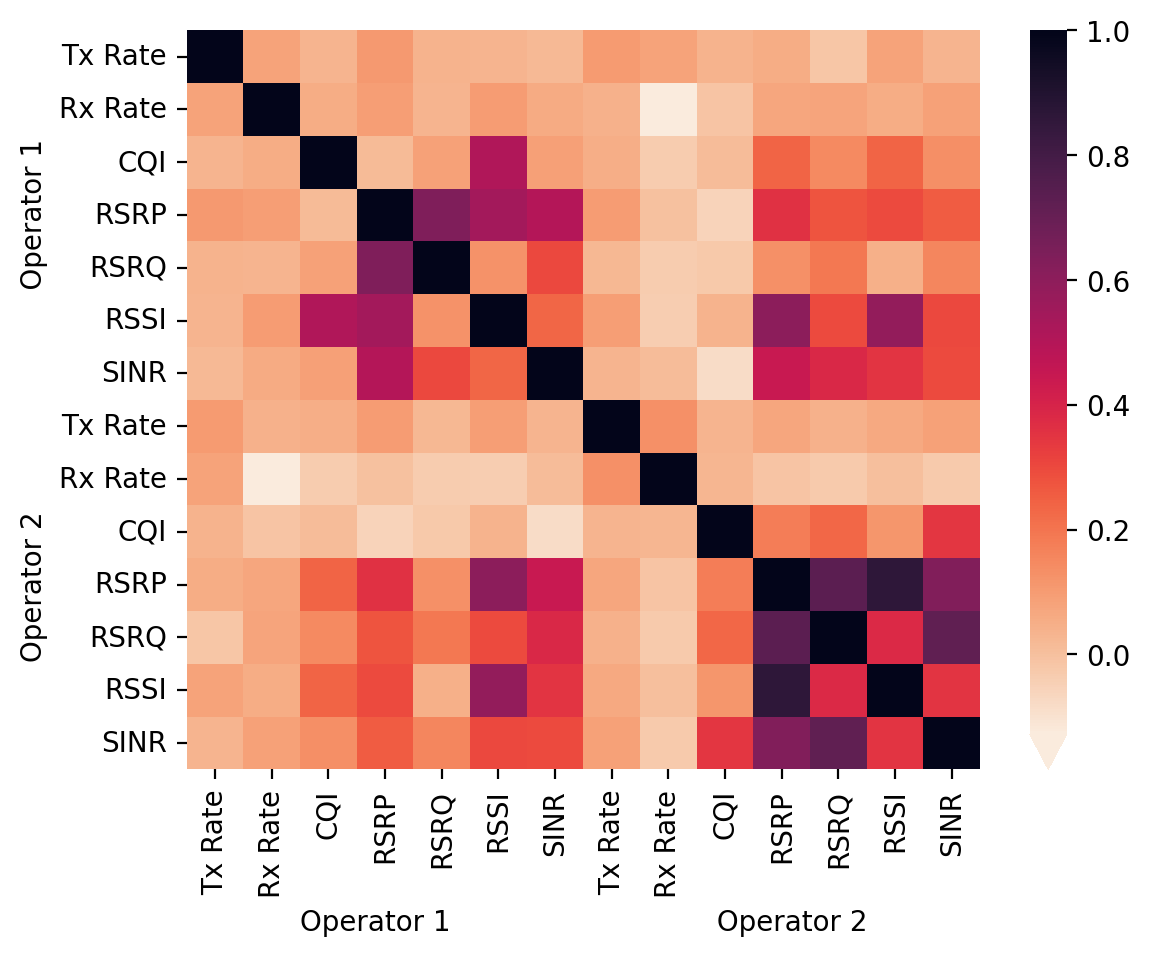

In [11]:
FIG_SIZE=(4, 4)
fig, ax = plt.subplots()

sns.heatmap(
    router_corr.rename(lambda x: x[:-1]).rename(columns=lambda x: x[:-1]), 
    cmap="rocket_r", cbar_kws={"extend": "min"}, ax=ax)

plt.xlabel("Operator 1"+(" "*30)+"Operator 2")
plt.ylabel("Operator 2"+(" "*25)+"Operator 1")
plt.savefig(f'plots/routers-correlation-d2-dtag.pdf', bbox_inches='tight')

In [12]:
selected_columns = ['timestamp_router', 
                    'lte.ltxbitspersecond', 
                    'lte.lrxbitspersecond', 
                    'lte.lCqi', 
                    'lte.lRsrp', 
                    'lte.lRsrq', 
                    'lte.lRssi', 
                    'lte.lSinr', 
                    'lte.lNrRsrp', 
                    'lte.lNrRsrq', 
                    'lte.lNrSinr']

In [13]:
df_D2 = pd.read_parquet(root_dir + input_5G_D2_WAVELAB_preprocessed, columns=selected_columns)
df_D2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25750092 entries, 2023-11-24 13:51:45 to 2024-11-01 12:59:48
Data columns (total 11 columns):
 #   Column                Non-Null Count     Dtype         
---  ------                --------------     -----         
 0   timestamp_router      25750092 non-null  datetime64[ns]
 1   lte.ltxbitspersecond  25750092 non-null  Int64         
 2   lte.lrxbitspersecond  25750092 non-null  Int64         
 3   lte.lCqi              25159617 non-null  Float64       
 4   lte.lRsrp             25747934 non-null  Float64       
 5   lte.lRsrq             25747929 non-null  Float64       
 6   lte.lRssi             9219773 non-null   Float64       
 7   lte.lSinr             25747929 non-null  Float64       
 8   lte.lNrRsrp           3515501 non-null   Float64       
 9   lte.lNrRsrq           3515501 non-null   Float64       
 10  lte.lNrSinr           3515501 non-null   Float64       
dtypes: Float64(8), Int64(2), datetime64[ns](1)
memory usage

In [14]:
df_DTAG = pd.read_parquet(root_dir + input_5G_DTAG_WAVELAB_preprocessed, columns=selected_columns)
df_DTAG.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25762417 entries, 2023-11-24 13:51:45 to 2024-11-01 12:59:27
Data columns (total 11 columns):
 #   Column                Non-Null Count     Dtype         
---  ------                --------------     -----         
 0   timestamp_router      25762417 non-null  datetime64[ns]
 1   lte.ltxbitspersecond  25762417 non-null  Int64         
 2   lte.lrxbitspersecond  25762417 non-null  Int64         
 3   lte.lCqi              25248739 non-null  Float64       
 4   lte.lRsrp             25748851 non-null  Float64       
 5   lte.lRsrq             25748851 non-null  Float64       
 6   lte.lRssi             25749073 non-null  Float64       
 7   lte.lSinr             25748851 non-null  Float64       
 8   lte.lNrRsrp           25715612 non-null  Float64       
 9   lte.lNrRsrq           25715612 non-null  Float64       
 10  lte.lNrSinr           25715612 non-null  Float64       
dtypes: Float64(8), Int64(2), datetime64[ns](1)
memory usage

In [ ]:
# Select a specific time range to analyze
start_date = '2024-06-28 16:00:00'
end_date = '2024-06-28 20:30:00'

mask = (df_D2['timestamp_router'] > start_date) & (df_D2['timestamp_router'] <= end_date)
df_D2 = df_D2.loc[mask]

mask = (df_DTAG['timestamp_router'] > start_date) & (df_DTAG['timestamp_router'] <= end_date)
df_DTAG = df_DTAG.loc[mask]

df_D2.drop(['timestamp_router'], axis=1, inplace=True)
df_DTAG.drop(['timestamp_router'], axis=1, inplace=True)

In [16]:
col_rename = {
    'lte.ltxbitspersecond': 'Tx Rate', 
    'lte.lrxbitspersecond': 'Rx Rate',
    'lte.lCqi': 'CQI',
    'lte.lRsrp': 'RSRP', 
    'lte.lRsrq': 'RSRQ',
    'lte.lRssi': 'RSSI', 
    'lte.lSinr': 'SINR',

    'lte.lNrRsrp': 'NrRSRP', 
    'lte.lNrRsrq': 'NrRSRQ',
    'lte.lNrSinr': 'NrSINR'
    }

df_D2.rename(columns=col_rename, inplace=True)
df_D2.head()

,Tx Rate,Rx Rate,CQI,RSRP,RSRQ,RSSI,SINR,NrRSRP,NrRSRQ,NrSINR
timestamp_router,,,,,,,,,,
2024-06-28 16:00:01,33860128,11626272,10.0,-67.0,-11.0,<NA>,16.0,<NA>,<NA>,<NA>
2024-06-28 16:00:02,18575680,1763136,11.0,-65.0,-11.0,<NA>,19.0,<NA>,<NA>,<NA>
2024-06-28 16:00:03,28582416,3756704,11.0,-65.0,-11.0,<NA>,19.0,<NA>,<NA>,<NA>
2024-06-28 16:00:04,27732432,5855456,11.0,-65.0,-11.0,<NA>,19.0,<NA>,<NA>,<NA>
2024-06-28 16:00:05,24235696,5848272,11.0,-65.0,-11.0,<NA>,17.0,<NA>,<NA>,<NA>


In [17]:
df_D2.corr()

,Tx Rate,Rx Rate,CQI,RSRP,RSRQ,RSSI,SINR,NrRSRP,NrRSRQ,NrSINR
Tx Rate,1.000000,0.337672,-0.073542,0.034513,-0.157859,0.114096,-0.312571,0.325362,0.092010,0.274729
Rx Rate,0.337672,1.000000,-0.049888,0.049045,-0.109756,0.095438,-0.114520,0.183706,0.056113,0.091540
CQI,-0.073542,-0.049888,1.000000,0.157125,0.280258,0.049179,0.449726,0.279887,0.091747,0.232240
RSRP,0.034513,0.049045,0.157125,1.000000,0.469227,0.887337,0.422326,0.393705,-0.033569,0.115282
RSRQ,-0.157859,-0.109756,0.280258,0.469227,1.000000,0.031409,0.681911,0.181667,0.147032,0.180827
RSSI,0.114096,0.095438,0.049179,0.887337,0.031409,1.000000,0.062477,0.354853,-0.086043,0.056559
SINR,-0.312571,-0.114520,0.449726,0.422326,0.681911,0.062477,1.000000,0.322051,0.169089,0.277521
NrRSRP,0.325362,0.183706,0.279887,0.393705,0.181667,0.354853,0.322051,1.000000,0.558399,0.756524
NrRSRQ,0.092010,0.056113,0.091747,-0.033569,0.147032,-0.086043,0.169089,0.558399,1.000000,0.632907
NrSINR,0.274729,0.091540,0.232240,0.115282,0.180827,0.056559,0.277521,0.756524,0.632907,1.000000


In [18]:
col_rename = {
    'lte.ltxbitspersecond': 'Tx Rate', 
    'lte.lrxbitspersecond': 'Rx Rate',
    'lte.lCqi': 'CQI',
    'lte.lRsrp': 'RSRP', 
    'lte.lRsrq': 'RSRQ',
    'lte.lRssi': 'RSSI', 
    'lte.lSinr': 'SINR',

    'lte.lNrRsrp': 'NrRSRP', 
    'lte.lNrRsrq': 'NrRSRQ',
    'lte.lNrSinr': 'NrSINR'
    }

df_DTAG.rename(columns=col_rename, inplace=True)
df_DTAG.head()

,Tx Rate,Rx Rate,CQI,RSRP,RSRQ,RSSI,SINR,NrRSRP,NrRSRQ,NrSINR
timestamp_router,,,,,,,,,,
2024-06-28 16:00:01,12995504,588432,10.0,-78.0,-15.0,-39.0,6.0,-74.0,-11.0,11.0
2024-06-28 16:00:02,17642208,725344,9.0,-79.0,-17.0,-41.0,4.0,-75.0,-11.0,11.0
2024-06-28 16:00:03,22362784,897760,9.0,-79.0,-17.0,-41.0,4.0,-75.0,-11.0,11.0
2024-06-28 16:00:04,20065600,838016,9.0,-79.0,-17.0,-41.0,4.0,-75.0,-11.0,11.0
2024-06-28 16:00:05,19979680,791920,9.0,-79.0,-17.0,-42.0,4.0,-74.0,-11.0,16.0


In [19]:
df_DTAG.corr()

,Tx Rate,Rx Rate,CQI,RSRP,RSRQ,RSSI,SINR,NrRSRP,NrRSRQ,NrSINR
Tx Rate,1.000000,-0.061806,-0.087942,-0.067606,-0.073003,-0.028295,-0.104616,0.004460,-0.002240,0.023721
Rx Rate,-0.061806,1.000000,0.035926,-0.054552,0.037382,-0.092209,-0.008835,-0.037440,0.071616,0.061715
CQI,-0.087942,0.035926,1.000000,0.383967,0.396915,0.216678,0.620421,0.129833,0.088327,0.164555
RSRP,-0.067606,-0.054552,0.383967,1.000000,0.540472,0.860189,0.602397,0.594009,0.181084,0.200312
RSRQ,-0.073003,0.037382,0.396915,0.540472,1.000000,0.086936,0.684489,-0.010976,0.093168,0.080662
RSSI,-0.028295,-0.092209,0.216678,0.860189,0.086936,1.000000,0.299932,0.708001,0.154818,0.183924
SINR,-0.104616,-0.008835,0.620421,0.602397,0.684489,0.299932,1.000000,0.176663,0.125566,0.195033
NrRSRP,0.004460,-0.037440,0.129833,0.594009,-0.010976,0.708001,0.176663,1.000000,0.389597,0.475558
NrRSRQ,-0.002240,0.071616,0.088327,0.181084,0.093168,0.154818,0.125566,0.389597,1.000000,0.519205
NrSINR,0.023721,0.061715,0.164555,0.200312,0.080662,0.183924,0.195033,0.475558,0.519205,1.000000


In [20]:
df_D2_selection = df_D2.add_suffix('1')
df_DTAG_selection = df_DTAG.add_suffix('2')

In [21]:
df_concat = pd.merge(df_D2_selection, df_DTAG_selection, 
                     left_index=True, right_index=True, 
                     how="outer").sort_index()
df_concat.head()

,Tx Rate1,Rx Rate1,CQI1,RSRP1,RSRQ1,RSSI1,SINR1,NrRSRP1,NrRSRQ1,NrSINR1,Tx Rate2,Rx Rate2,CQI2,RSRP2,RSRQ2,RSSI2,SINR2,NrRSRP2,NrRSRQ2,NrSINR2
timestamp_router,,,,,,,,,,,,,,,,,,,,
2024-06-28 16:00:01,33860128,11626272,10.0,-67.0,-11.0,<NA>,16.0,<NA>,<NA>,<NA>,12995504,588432,10.0,-78.0,-15.0,-39.0,6.0,-74.0,-11.0,11.0
2024-06-28 16:00:02,18575680,1763136,11.0,-65.0,-11.0,<NA>,19.0,<NA>,<NA>,<NA>,17642208,725344,9.0,-79.0,-17.0,-41.0,4.0,-75.0,-11.0,11.0
2024-06-28 16:00:03,28582416,3756704,11.0,-65.0,-11.0,<NA>,19.0,<NA>,<NA>,<NA>,22362784,897760,9.0,-79.0,-17.0,-41.0,4.0,-75.0,-11.0,11.0
2024-06-28 16:00:04,27732432,5855456,11.0,-65.0,-11.0,<NA>,19.0,<NA>,<NA>,<NA>,20065600,838016,9.0,-79.0,-17.0,-41.0,4.0,-75.0,-11.0,11.0
2024-06-28 16:00:05,24235696,5848272,11.0,-65.0,-11.0,<NA>,17.0,<NA>,<NA>,<NA>,19979680,791920,9.0,-79.0,-17.0,-42.0,4.0,-74.0,-11.0,16.0


In [22]:
router_corr = df_concat.corr()
router_corr

,Tx Rate1,Rx Rate1,CQI1,RSRP1,RSRQ1,RSSI1,SINR1,NrRSRP1,NrRSRQ1,NrSINR1,Tx Rate2,Rx Rate2,CQI2,RSRP2,RSRQ2,RSSI2,SINR2,NrRSRP2,NrRSRQ2,NrSINR2
Tx Rate1,1.000000,0.337672,-0.073542,0.034513,-0.157859,0.114096,-0.312571,0.325362,0.092010,0.274729,0.153070,0.104026,-0.082320,-0.021531,-0.133763,0.046279,-0.107104,0.087771,0.074827,0.099986
Rx Rate1,0.337672,1.000000,-0.049888,0.049045,-0.109756,0.095438,-0.114520,0.183706,0.056113,0.091540,0.510714,-0.231087,-0.037937,0.069464,-0.080096,0.133745,-0.025986,0.157578,-0.010468,0.037150
CQI1,-0.073542,-0.049888,1.000000,0.157125,0.280258,0.049179,0.449726,0.279887,0.091747,0.232240,-0.024684,0.001498,0.041271,-0.032108,-0.039648,-0.011172,0.019053,0.033523,0.038266,0.042771
RSRP1,0.034513,0.049045,0.157125,1.000000,0.469227,0.887337,0.422326,0.393705,-0.033569,0.115282,-0.012459,-0.008200,0.069210,0.326772,-0.062483,0.412094,0.095550,0.385692,0.073758,0.036540
RSRQ1,-0.157859,-0.109756,0.280258,0.469227,1.000000,0.031409,0.681911,0.181667,0.147032,0.180827,-0.120760,0.018264,0.087357,-0.010623,0.018179,-0.023954,0.035717,0.048509,0.034718,0.072206
RSSI1,0.114096,0.095438,0.049179,0.887337,0.031409,1.000000,0.062477,0.354853,-0.086043,0.056559,0.078544,0.063450,0.098342,0.468099,-0.082045,0.580717,0.139235,0.478205,0.060323,0.010623
SINR1,-0.312571,-0.114520,0.449726,0.422326,0.681911,0.062477,1.000000,0.322051,0.169089,0.277521,-0.173505,-0.095301,0.131596,0.055769,0.019228,0.052638,0.112685,0.080960,0.023666,0.063876
NrRSRP1,0.325362,0.183706,0.279887,0.393705,0.181667,0.354853,0.322051,1.000000,0.558399,0.756524,-0.042818,0.112601,0.164072,0.220257,-0.076730,0.299164,0.127026,0.356235,0.127494,0.252924
NrRSRQ1,0.092010,0.056113,0.091747,-0.033569,0.147032,-0.086043,0.169089,0.558399,1.000000,0.632907,-0.068544,0.023334,0.119418,-0.006496,0.044470,-0.039189,0.072205,0.024912,0.078034,0.192296
NrSINR1,0.274729,0.091540,0.232240,0.115282,0.180827,0.056559,0.277521,0.756524,0.632907,1.000000,-0.121497,0.134298,0.156821,0.023482,-0.053503,0.038199,0.078928,0.159989,0.125448,0.296922


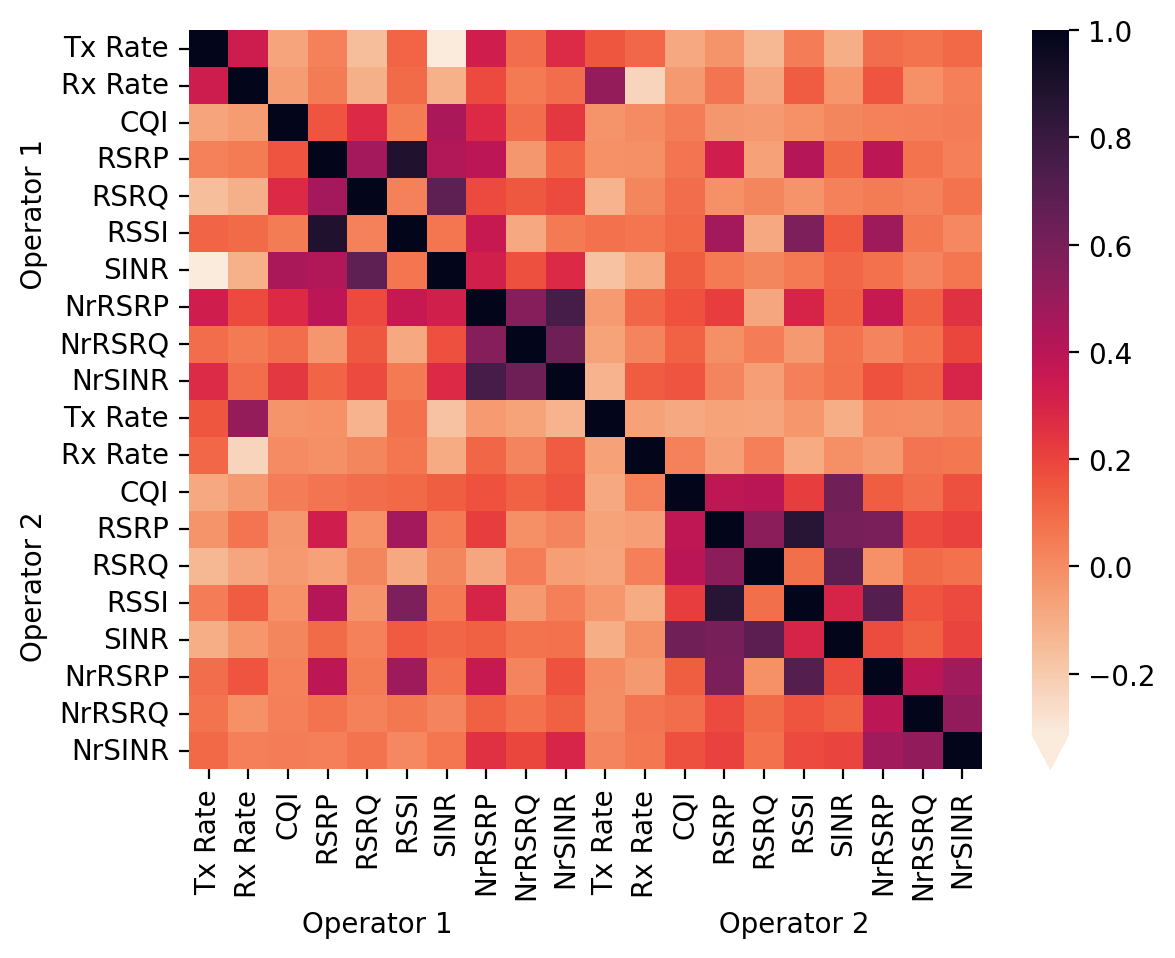

In [23]:
FIG_SIZE=(4, 4)
fig, ax = plt.subplots()

sns.heatmap(
    router_corr.rename(lambda x: x[:-1]).rename(columns=lambda x: x[:-1]), 
    cmap="rocket_r", cbar_kws={"extend": "min"}, ax=ax)

plt.xlabel("Operator 1"+(" "*30)+"Operator 2")
plt.ylabel("Operator 2"+(" "*25)+"Operator 1")
plt.savefig(f'plots/routers-correlation-d2-dtag-Kieler-Woche.pdf', bbox_inches='tight')